<a href="https://colab.research.google.com/github/quratulain-coder/Dep/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***House_Price_Prediction***

***Using Linear Regression***

**By Qurat-ul-ain**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

**-----------------Importing Data--------------**

In [6]:
df = pd.read_csv('Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As all the entries containing some values.
no any row contain garbage value so there's no need of
cleaning


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**-------------Exploring Data------------**




In [18]:
import seaborn as sns

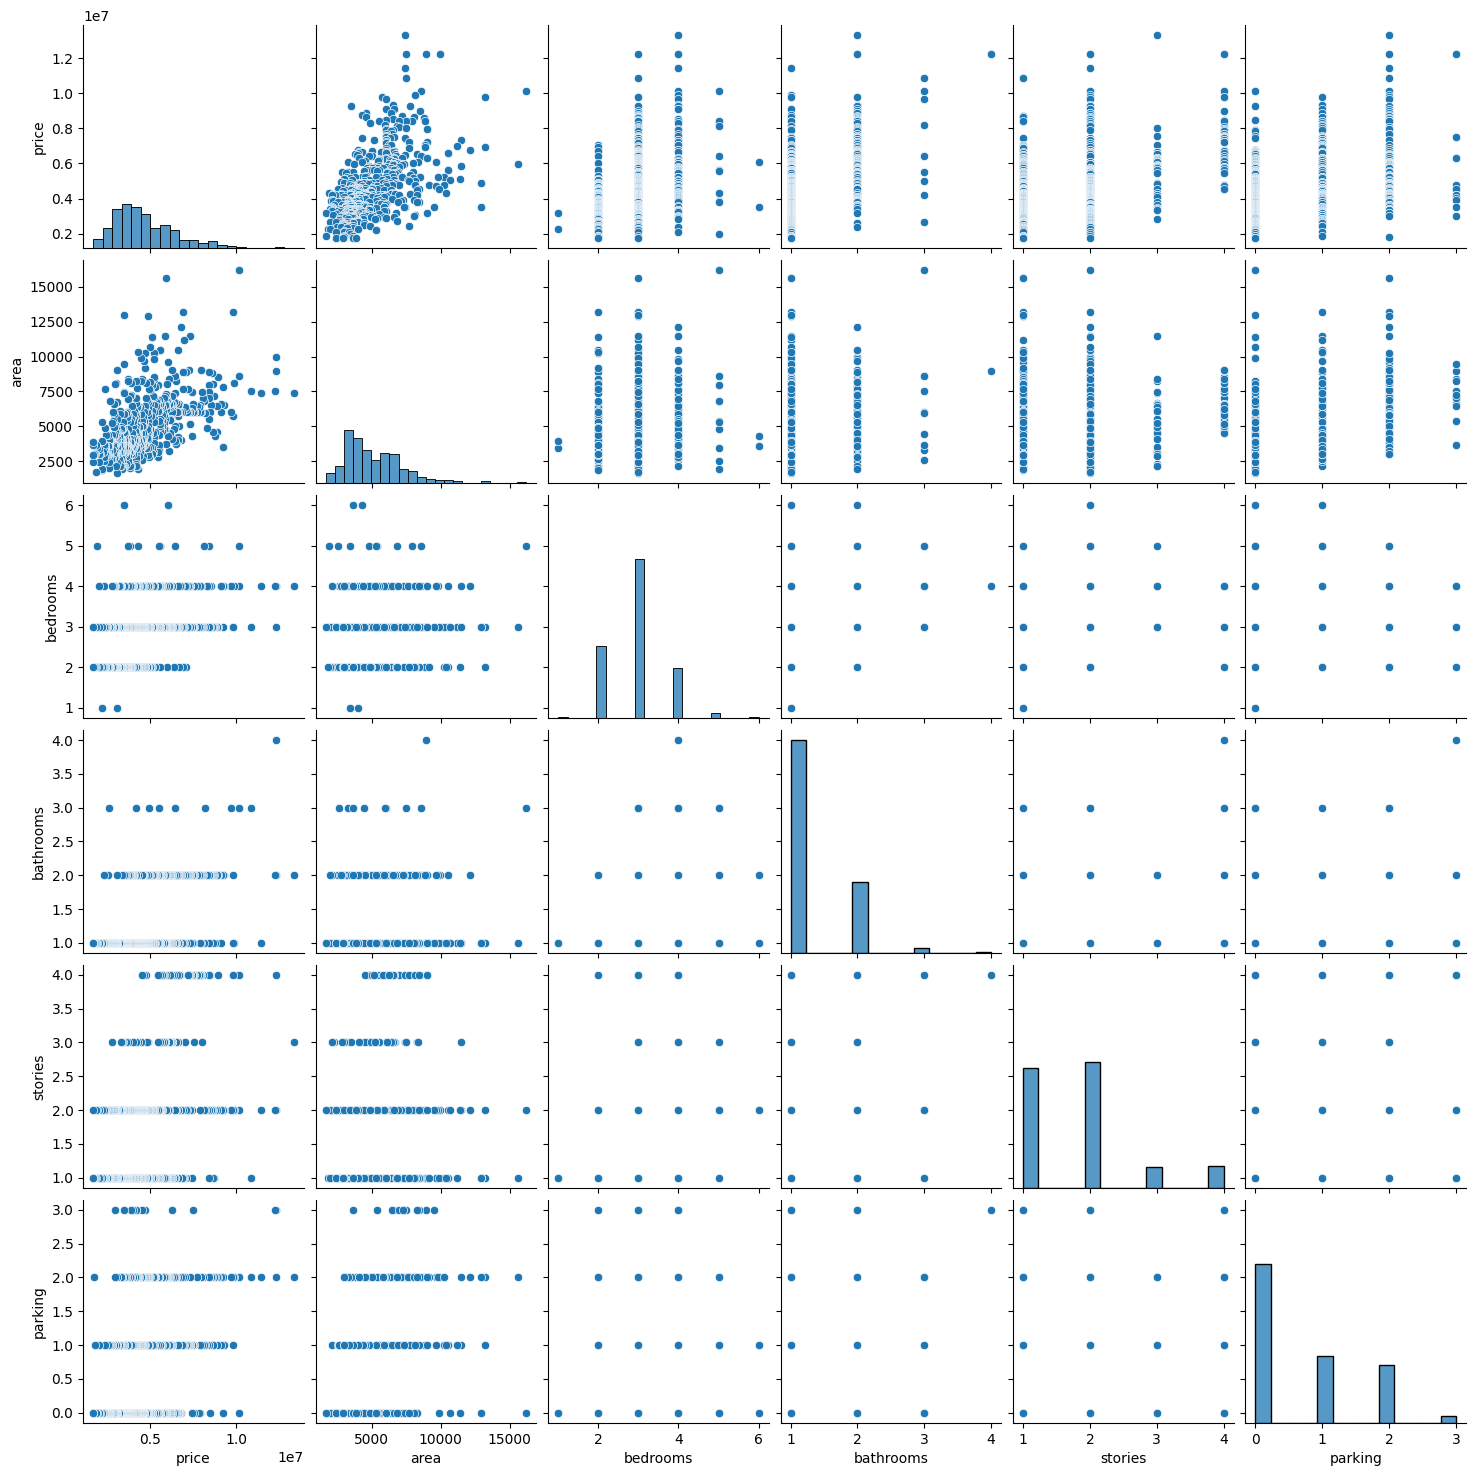

In [13]:
sns.pairplot(df)

**--------------Feature Engineering-------------**

In [32]:
df1 = df. drop('furnishingstatus', axis =1)

In [33]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


**----------------Data Visualization------------**

<Axes: >

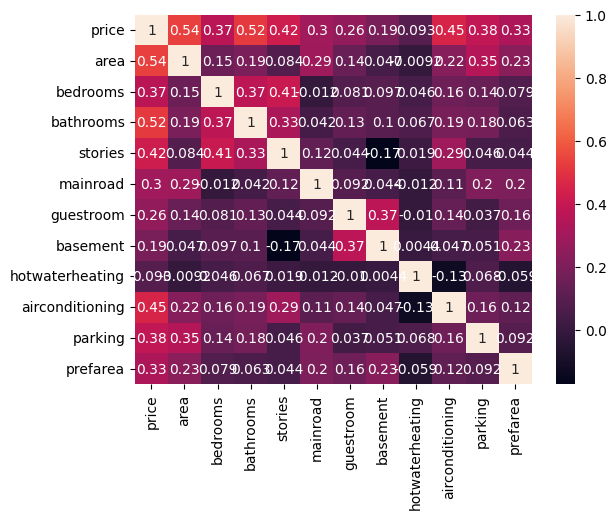

In [34]:
sns.heatmap(df1.corr(), annot = True)

In [55]:
df = pd.read_csv('Housing.csv')

In [77]:
X = df1 [['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]

In [78]:
y = df1 ['price']

**-------------Test split-------------------**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

**-------------Model Training------------**

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(X_train, y_train)


LinearRegression()

In [86]:
coeff_df1 = pd.DataFrame(lm.coef_, X.columns, columns=['coefficient'])


In [87]:
print(coeff_df1)


                  coefficient
bedrooms         9.432439e+04
bathrooms        1.114982e+06
stories          4.244963e+05
mainroad         7.663238e+05
guestroom        2.755801e+05
basement         4.021141e+05
hotwaterheating  9.261280e+05
airconditioning  1.013356e+06
parking          4.751182e+05
prefarea         8.859273e+05


In [88]:
X_train

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
375,3,1,2,1,1,1,0,0,0,0
187,3,1,1,1,0,1,0,1,0,1
109,4,2,2,1,1,0,1,0,1,0
454,3,1,2,1,0,0,0,1,0,0
382,3,1,2,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
316,4,2,2,0,0,1,0,0,1,0
393,3,1,1,0,0,0,0,0,0,0
75,4,2,2,1,0,0,1,0,0,0
337,4,2,1,1,0,1,0,0,0,1


**-----------------Predict Data------------------**

In [89]:
prediction = lm.predict(X_test)

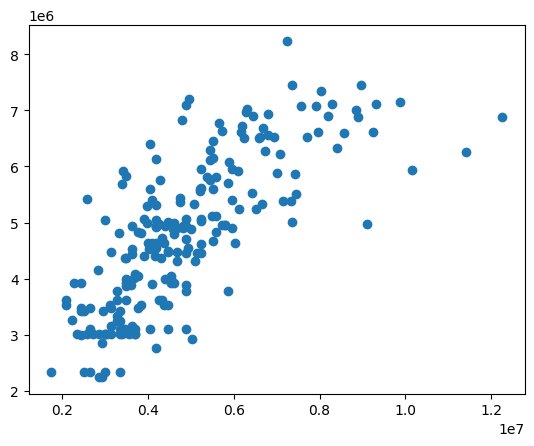

In [92]:
plt.scatter(y_test, prediction)

<ipython-input-93-57819dcbecce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction, ), bins = 50)


<Axes: ylabel='Density'>

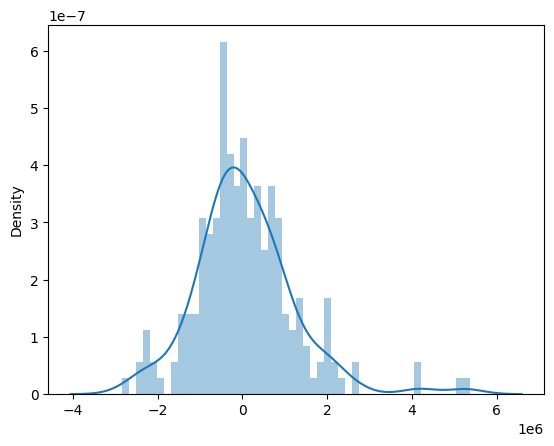

In [93]:
sns.distplot((y_test-prediction, ), bins = 50)